# 2018/2019 Premier League Dataset Exploration
In this notebook, we're going to answer some key questions based on 2018/2019 Premier League dataset

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import shapiro     #Shapiro-Wilk Test, to perform normality test

In [2]:
#Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Syukrondzeko/Fellowship-5/main/epl_1819.csv')

In [3]:
df.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


# 1. Is the dataset clean?
To answer this question, we need to check on two things: whether or not the dataset contains missing value, and whether or not the dataset contains columns with inappropriate data type.

We will first check on any missing value by making heatmap of missing values

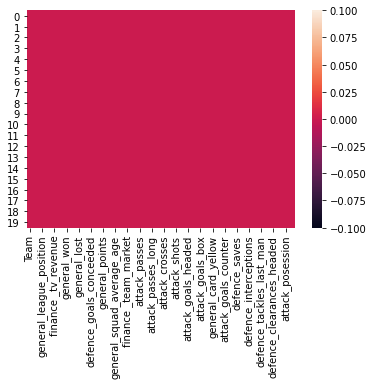

In [4]:
sns.heatmap(df.isna())

The heat map shows that the dataset contains no missing values.

Next, we check on any inappropriate data types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

It seems strange that 'attack_passes', 'attack_passes_long', 'attack_passes_back', and 'defence_clearances' use object datatype. Let's have a look at their values

In [6]:
df['attack_passes'].head()

0    26,581
1    23,638
2    25,070
3    21,295
4    20,805
Name: attack_passes, dtype: object

The entries contain comma character, hence they are categorized as object. Thus, we need to remove all commas on those four columns and change the datatype to integer.

In [7]:
#Remove the commas and change the datatype to integer on those four columns
df['attack_passes']=df['attack_passes'].str.replace(',','').astype('int64')
df['attack_passes_long']=df['attack_passes_long'].str.replace(',','').astype('int64')
df['attack_passes_back']=df['attack_passes_back'].str.replace(',','').astype('int64')
df['defence_clearances']=df['defence_clearances'].str.replace(',','').astype('int64')

Let's check once again on their values and datatypes.

In [8]:
df['attack_passes'].head()

0    26581
1    23638
2    25070
3    21295
4    20805
Name: attack_passes, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

Thus, we conclude that the original dataset is not clean, because it contains inappropriate datatypes.

Now that we have clean the data, we can move on to next questions.

# 2. How is the distribution of the points? Which team is anomaly?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


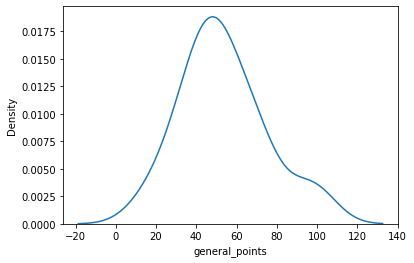

In [10]:
#Make a distribution plot
sns.distplot(df['general_points'],hist=False)

The distribution plot looks quite similar to normal distribution plot. Let's perform Shapiro-Wilk Test to test its normality

(https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93)

In [11]:
shapiro(df['general_points'])

(0.9527729749679565, 0.41115203499794006)

The test generates a p-value of 0.411 which is greater than the significance of 0.05. Thus, we conclude that the points distribution among Premier League teams is normal.

Next, we look at any anomalies. We can use boxplot to show any outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


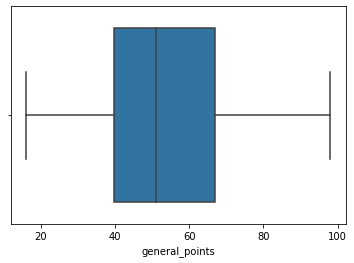

In [12]:
sns.boxplot(df['general_points'])

The box plot shows no outliers in points column, hence we conclude that there are no anomalies in points distribution.

# 3. Which team has the best attack?

There are so many ways to measure attacking performance. To get a better view on every team's attack, we generate a new DataFrame consists of only attacking columns.

In [13]:
df_att = df[['Team','general_league_position','general_points','attack_scored','attack_passes','attack_passes_through',\
             'attack_passes_long','attack_passes_back','attack_crosses','attack_corners_taken','attack_shots',\
             'attack_shots_on_target','attack_goals_headed','attack_goals_penalty','attack_goals_box',\
             'attack_goals_outsidebox','attack_goals_counter','attack_goals_freekick',\
             'attack_posession', 'attack_pass_accuracy']]
df_att

,Team,general_league_position,general_points,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
0,Manchester City,1,98,95,26581,112,1814,4240,783,298,683,260,12,3,80,15,5,2,64.0,89.0
1,Liverpool,2,97,89,23638,98,2250,3416,721,249,575,226,19,7,84,5,6,1,58.8,84.4
2,Chelsea,3,72,63,25070,146,1774,3874,692,215,607,198,8,5,54,9,1,1,59.9,87.6
3,Tottenham,4,71,67,21295,87,2267,3191,643,194,537,189,14,4,53,14,5,2,56.7,83.2
4,Arsenal,5,70,73,20805,65,2062,3102,605,209,467,170,5,4,62,11,3,3,56.1,83.3
5,Manchester United,6,66,65,19202,63,2242,2634,638,200,526,225,4,9,55,10,4,2,53.3,82.3
6,Wolverhampton,7,57,47,16618,51,2552,2515,622,195,477,152,10,4,44,3,5,2,47.4,78.2
7,Everton,8,54,54,16494,44,2310,2362,814,215,498,169,13,2,45,10,3,0,51.0,77.3
8,Leicester,9,52,51,17219,88,2335,2593,779,210,515,184,9,5,43,8,8,3,50.8,79.2
9,West Ham,10,52,52,16358,75,2315,2273,630,188,441,157,10,5,47,5,3,0,49.0,78.7


To answer this question, we will take a look at "effective passing accuracy". The dataset contains a column of passing accuracy, which includes every types of pass (forward, backward, cross, through pass, etc.) However, we know that in football, back passes have little or no contributions toward attacking threat. They also require very little creativity from the passer and clever positioning from the receiver. Hence, we will find out passing accuracy for each team only for passes that actually matter.

Here's how we calculate effective passing accuracy. First, we need to get the the number of total passing attempts for each team using this formula:

Total passing attempts = floor(Total passes made / Passing accuracy)

Next, we're going to assume that all 20 teams have 100% accuracy for back passes (come on, it's not that difficult for those elite footballers). In other words, we're assuming that for every teams, the number of back pass attempts is equal to back passes made ('attack_passes_back'). Thus, we can calculate effective passing accuracy by taking back passes attempts out of the passing accuracy equation:

Effective passing accuracy = (Total passes made - Total back passes made) / (Total passing attempts - Total back passes attempted)

In [14]:
#Calculate total passing attempts.
#The accuracy is divided by 100 to get the accuracy value in form of, let's say 0.63 instead of 63 as written on the dataset.
#The result is floored so that we get integer values.
df_att['attack_passes_attempts'] = np.floor(df_att['attack_passes'] / (df_att['attack_pass_accuracy']/100))

#Calculate effective passing accuracy
#The result is multiplied by 100 to get the value in form of, let's say 61 (percent) instead of 0.61
#It is then rounded to 2 decimal digits
df_att['attack_eff_pass_accuracy'] = round(100 * (df_att['attack_passes'] - df_att['attack_passes_back']) / (df_att['attack_passes_attempts'] - df_att['attack_passes_back']),2)

#Remove the temporary total passing attempts column
df_att.drop('attack_passes_attempts',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [15]:
#Sort the table by effective passing accuracy (descending)
df_att[['Team','general_league_position','general_points','attack_pass_accuracy','attack_eff_pass_accuracy']].sort_values('attack_eff_pass_accuracy',ascending=False)

,Team,general_league_position,general_points,attack_pass_accuracy,attack_eff_pass_accuracy
0,Manchester City,1,98,89.0,87.18
2,Chelsea,3,72,87.6,85.66
1,Liverpool,2,97,84.4,82.23
4,Arsenal,5,70,83.3,80.94
3,Tottenham,4,71,83.2,80.81
5,Manchester United,6,66,82.3,80.05
18,Fulham,19,26,80.3,77.49
8,Leicester,9,52,79.2,76.38
9,West Ham,10,52,78.7,76.09
13,Bournemouth,14,45,78.1,75.39


Turns out the difference between passing accuracy and effective passing accuracy falls around 2 to 4 percent for every team.

We find out that Manchester City has the highest effective passing accuracy. Thus we can conclude that Manchester City has the best attacking in the league.

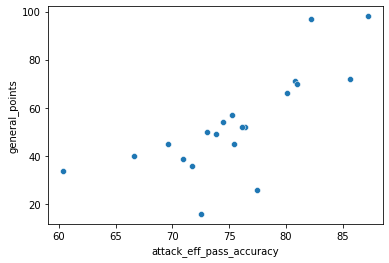

In [16]:
sns.scatterplot(x='attack_eff_pass_accuracy',y='general_points',data=df_att)

# 4. Which team has the best defense?

In [17]:
df_def = df[['Team','general_league_position','general_points','defence_goals_conceeded','defence_saves',\
             'defence_blocks','defence_interceptions','defence_tackles','defence_tackles_last_man',\
             'defence_clearances','defence_clearances_headed', 'defence_penalty_conceeded']]
df_def

,Team,general_league_position,general_points,defence_goals_conceeded,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded
0,Manchester City,1,98,23,58,63,362,518,0,543,295,4
1,Liverpool,2,97,22,76,78,314,610,2,639,317,1
2,Chelsea,3,72,39,85,73,351,618,2,593,330,2
3,Tottenham,4,71,39,121,112,326,626,3,770,411,5
4,Arsenal,5,70,51,133,118,412,609,2,762,404,7
5,Manchester United,6,66,54,122,128,355,581,2,785,370,6
6,Wolverhampton,7,57,46,100,148,501,720,2,824,464,4
7,Everton,8,54,46,94,85,456,700,4,825,430,5
8,Leicester,9,52,48,90,96,436,676,4,945,500,5
9,West Ham,10,52,55,148,141,457,723,5,855,397,5


To answer this question, we will take a look at how effective teams are at denying opposition's goal scoring chances. To do that, we will perform the following calculation:

Chance-denying score = (Total saves + Total last-man tackles) / Total goals conceded

In [18]:
df_def['defence_chance_denying'] = (df_def['defence_saves'] + df_def['defence_tackles_last_man']) / df_def['defence_goals_conceeded']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_def[['Team','general_league_position','general_points','defence_goals_conceeded','defence_saves','defence_tackles_last_man','defence_chance_denying']].sort_values('defence_chance_denying',ascending=False)

,Team,general_league_position,general_points,defence_goals_conceeded,defence_saves,defence_tackles_last_man,defence_chance_denying
1,Liverpool,2,97,22,76,2,3.545455
3,Tottenham,4,71,39,121,3,3.179487
9,West Ham,10,52,55,148,5,2.781818
4,Arsenal,5,70,51,133,2,2.647059
0,Manchester City,1,98,23,58,0,2.521739
5,Manchester United,6,66,54,122,2,2.296296
10,Watford,11,50,59,127,8,2.288136
2,Chelsea,3,72,39,85,2,2.230769
6,Wolverhampton,7,57,46,100,2,2.217391
11,Crystal Palace,12,49,53,113,2,2.169811


Turns out, Liverpool is very good at denying opposition's chances.

Hence, we conclude that Liverpool has the best defense in the league.

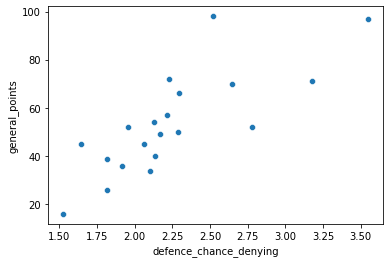

In [20]:
sns.scatterplot(x='defence_chance_denying',y='general_points',data=df_def)

# 5. Which team is good in financial aspect?

In [21]:
df_fin = df[['Team','general_league_position','general_points','category','finance _live_games_televised',\
             'finance _tv_revenue','finance _team_market','finance _market_average','general_squad_size']]
df_fin

,Team,general_league_position,general_points,category,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average,general_squad_size
0,Manchester City,1,98,Champions League,26,150986355,1003200000,39987200,25
1,Liverpool,2,97,Champions League,29,152425146,836440000,34848000,24
2,Chelsea,3,72,Champions League Qualification,25,146030216,779460000,29981600,26
3,Tottenham,4,71,Champions League Qualification,26,145230801,735240000,29409600,25
4,Arsenal,5,70,Europa League,25,142193180,701800000,26989600,26
5,Manchester United,6,66,Europa League,27,142512868,550440000,22017600,26
6,Wolverhampton,7,57,Europa League Qualification,15,127165114,369600000,16068800,23
7,Everton,8,54,No UEFA Competitions,18,128603905,305360000,11748000,26
8,Leicester,9,52,No UEFA Competitions,15,123328078,284240000,10929600,26
9,West Ham,10,52,No UEFA Competitions,16,122528663,234212000,9011200,26


We will look at return on investment for every teams. Since we don't have any data on team's expense, we use player's market value to substitute expense data. We will see how top teams utilize their highly-valued players to generate points and how mid and bottom tier teams perform with their cheaply-valued teams.

The 'finance _market_average' column tells us the average of player's market value for each teams. We will multiply that figure with number of players for each teams to get total player's market value for every team.

To calculate team's return on investment, we use the following formula:

Points per million pounds = Total points / Total player's market value (in million pounds)

Note: Please keep in mind that a player's market value is not team's total expense for that player. For example, if Harry Kane has a market value of 150 million pounds, that doesn't necessarily means that Tottenham Hotspur have spent 150 million pounds on Kane's initial purchase and salary.

In [22]:
df_fin['finance_total_pmarket'] = df_fin['general_squad_size']*df_fin['finance _market_average']
df_fin['finance_points_per_m_pounds'] = df_fin['general_points'] / (df_fin['finance_total_pmarket'] / 1000000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df_fin[['Team','general_league_position','general_points','finance_total_pmarket','finance_points_per_m_pounds']].sort_values('finance_points_per_m_pounds',ascending=False)

,Team,general_league_position,general_points,finance_total_pmarket,finance_points_per_m_pounds
15,Southampton,16,39,160160000,0.243506
18,Fulham,19,26,106920000,0.243172
16,Brighton,17,36,152609600,0.235896
14,Burnley,15,40,176404800,0.226751
13,Bournemouth,14,45,200200000,0.224775
17,Cardiff,18,34,152020000,0.223655
9,West Ham,10,52,234291200,0.221946
11,Crystal Palace,12,49,223581600,0.219159
10,Watford,11,50,229240000,0.218112
12,Newcastle,13,45,214016000,0.210265


Southampton is the best team in terms of ROI. Hence, we conclude that Southampton is the team with the best financial condition.

# 6. Does success in football cost a lot of quid? 

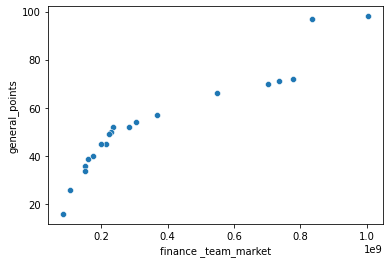

In [24]:
sns.scatterplot(x=df['finance _team_market'], y=df['general_points'])

Yes, it costs a lot of quid to be successful in professional football.